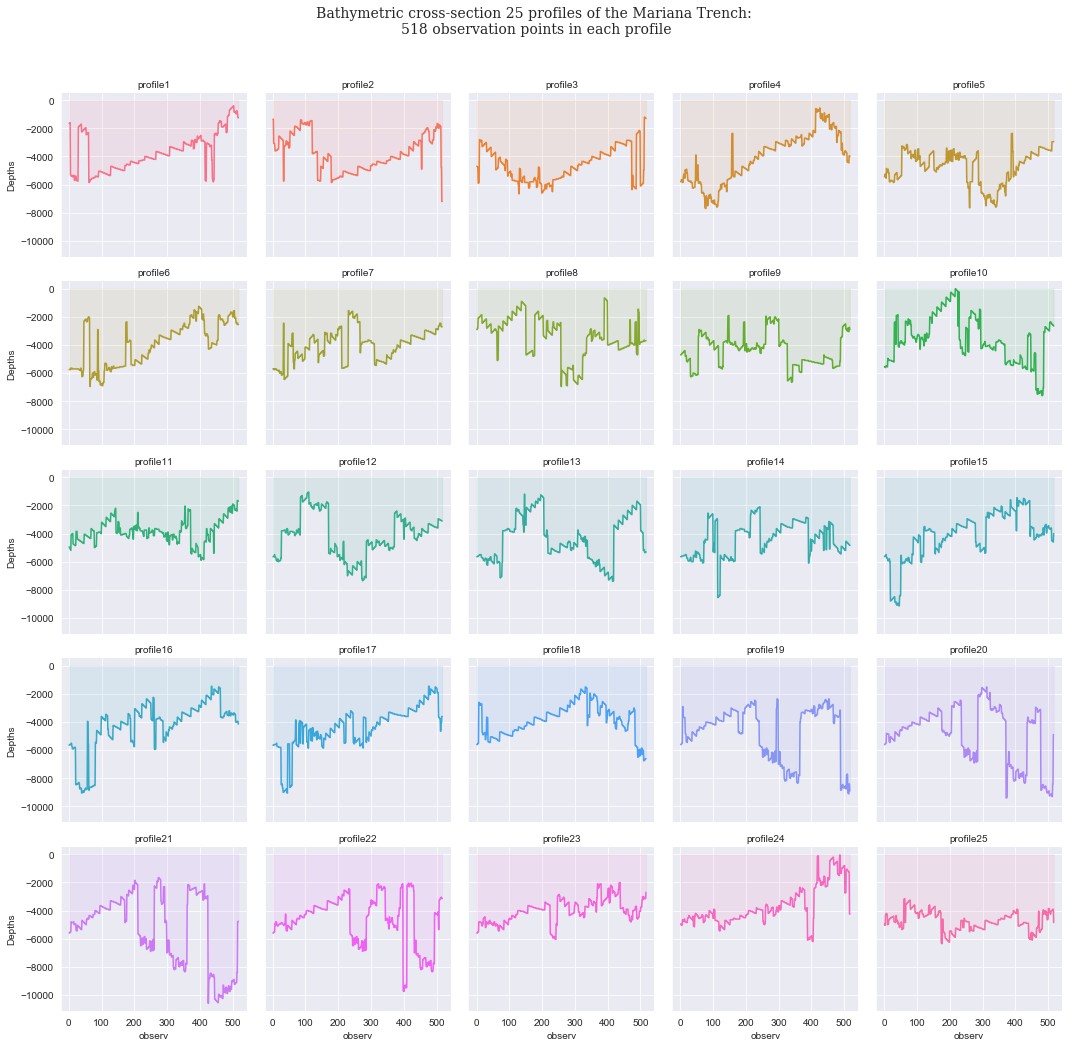

In [24]:
# libraries
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

# import data
import os
os.chdir('/Users/pauline/Documents/Python')
dfM = pd.read_csv("Tab-Bathy.csv")
sb.set_style('darkgrid')
df = dfM.melt(id_vars=['observ'], 
              value_vars=["profile1", "profile2", "profile3", "profile4", "profile5", 
                          "profile6", "profile7","profile8", "profile9", "profile10",
                          "profile11", "profile12", "profile13", "profile14", "profile15",
                          "profile16", "profile17", "profile18", "profile19", "profile20",
                          "profile21", "profile22", "profile23", "profile24", "profile25"],
              var_name='Profiles', value_name='Depths')
#print(df.head)

# Create a grid : initialize it
g = sb.FacetGrid(df, col='Profiles', hue='Profiles', col_wrap=5, )

# Add the line over the area with the plot function
g = g.map(plt.plot, 'observ', 'Depths')

# Fill the area with fill_between
g = g.map(plt.fill_between, 'observ', 'Depths', alpha=0.1).set_titles("{col_name} Profile")

# Control the title of each facet
g = g.set_titles("{col_name}")

# Add a title for the whole plot
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Bathymetric cross-section 25 profiles of the Mariana Trench: \n518 observation points in each profile', fontsize=14, fontfamily='serif')
plt.subplots_adjust(bottom=0.05,top=0.90)
plt.show()